# Working with raster data

## Raster data in Python



- rasters are images, they are best thought of as 2-dimensional arrays 
- using multiple bands we could think of an image as a 3-dimensional array
- this why we use NumPy to manipulate our raster data

<img src="images/raster-concept.png"  width=900/>

<right>
<sub><sup>
Source: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/
</sup></sub>
<right>

## GDAL

For importing and exporting of raster data files we can you use the poweful GDAL python package which includes a large set of tools for programming for manipulating the GDAL (Geospatial Data Abstraction) Library. GDAL actually includes two libraries: GDAL for manipulating geospatial raster data and OGR for manipulating geospatial vector data

- GDAL (Geospatial Data Abstraction Library) is the de facto standard library for interaction and manipulation of geospatial raster data
-  primary purpose of GDAL or a GDAL-enabled library is to read, write and transform geospatial datasets 
-  GDAL also includes a set of command-line utilities

<img src="images/gdal.png" width=100  />

Which formats can GDAL read and write?

In [1]:
%system gdalinfo --formats

['Supported Formats:',
 '  VRT -raster- (rw+v): Virtual Raster',
 '  DERIVED -raster- (ro): Derived datasets using VRT pixel functions',
 '  GTiff -raster- (rw+vs): GeoTIFF',
 '  NITF -raster- (rw+vs): National Imagery Transmission Format',
 '  RPFTOC -raster- (rovs): Raster Product Format TOC format',
 '  ECRGTOC -raster- (rovs): ECRG TOC format',
 '  HFA -raster- (rw+v): Erdas Imagine Images (.img)',
 '  SAR_CEOS -raster- (rov): CEOS SAR Image',
 '  CEOS -raster- (rov): CEOS Image',
 '  JAXAPALSAR -raster- (rov): JAXA PALSAR Product Reader (Level 1.1/1.5)',
 '  GFF -raster- (rov): Ground-based SAR Applications Testbed File Format (.gff)',
 '  ELAS -raster- (rw+v): ELAS',
 '  AIG -raster- (rov): Arc/Info Binary Grid',
 '  AAIGrid -raster- (rwv): Arc/Info ASCII Grid',
 '  GRASSASCIIGrid -raster- (rov): GRASS ASCII Grid',
 '  SDTS -raster- (rov): SDTS Raster',
 '  DTED -raster- (rwv): DTED Elevation Raster',
 '  PNG -raster- (rwv): Portable Network Graphics',
 '  JPEG -raster- (rwv): JP

GDAL can operate on local files or even read files from the web 

In [2]:
SERVER='http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1'
IMAGE='LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
%system gdalinfo /vsicurl/$SERVER/$IMAGE

['Driver: GTiff/GeoTIFF',
 'Files: /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF',
 '       /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF.ovr',
 '       /vsicurl/http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_MTL.txt',
 'Size is 7821, 7951',
 'Coordinate System is:',
 'PROJCRS["WGS 84 / UTM zone 11N",',
 '    BASEGEOGCRS["WGS 84",',
 '        DATUM["World Geodetic System 1984",',
 '            ELLIPSOID["WGS 84",6378137,298.257223563,',
 '                LENGTHUNIT["metre",1]]],',
 '        PRIMEM["Greenwich",0,',
 '            ANGLEUNIT["degree",0.0174532925199433]],',
 '        ID["EPSG",4326]],',
 '    CONVERSION["UTM zone 11N",',
 '        METHOD["Transverse Mercator",',
 '            ID["EPSG",980

Let’s start with inspecting our raster data

In [8]:
from osgeo import gdal

filepath = "Data/raster/DSM_small.tif"

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
raster

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f4246f8cd20> >

The raster is now stored as a GDAL Dataset object in the variable raster. Now we can have a closer look at the properties

In [12]:
# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize
raster.RasterYSize

# Number of bands
raster.RasterCount

# Metadata for the raster dataset
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

### Get raster bands

In [14]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)

# Data type of the values
gdal.GetDataTypeName(band.DataType)


'Float32'

### Band statistics

In [15]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

Statistics computed.
[ NO DATA VALUE ] =  -3.4e+38
[ MIN ] =  852.54998779297
[ MAX ] =  1124.9399414062


### Reading raster data into array

In [16]:
rasterArray = raster.ReadAsArray()
rasterArray

array([[ 986.7 ,  992.86,  992.33, ..., 1056.04, 1055.96, 1056.15],
       [ 990.9 ,  992.47,  990.31, ..., 1057.23, 1058.12, 1054.76],
       [ 991.81,  974.61,  976.22, ..., 1054.89, 1055.89, 1049.62],
       ...,
       [ 890.38,  883.26,  892.77, ...,  948.27,  948.2 ,  948.12],
       [ 881.79,  888.48,  883.76, ...,  950.76,  948.38,  948.3 ],
       [ 885.64,  888.03,  888.49, ...,  955.76,  955.2 ,  948.16]],
      dtype=float32)

GDAL also provides ready to use binaries, which you can run directly from command line (No need for importing libraries). 
These commands can be also run from your terminal. (The exclamation mark can be used to access the underlying shell directly from ipython)

In [6]:
%system gdalinfo ./Data/raster/DSM_small.tif

['Driver: GTiff/GeoTIFF',
 'Files: ./Data/raster/DSM_small.tif',
 'Size is 1424, 1001',
 'Coordinate System is:',
 'BOUNDCRS[',
 '    SOURCECRS[',
 '        PROJCRS["DHDN / 3-degree Gauss-Kruger zone 4",',
 '            BASEGEOGCRS["DHDN",',
 '                DATUM["Deutsches Hauptdreiecksnetz",',
 '                    ELLIPSOID["Bessel 1841",6377397.155,299.1528128,',
 '                        LENGTHUNIT["metre",1]]],',
 '                PRIMEM["Greenwich",0,',
 '                    ANGLEUNIT["degree",0.0174532925199433]],',
 '                ID["EPSG",4314]],',
 '            CONVERSION["3-degree Gauss-Kruger zone 4",',
 '                METHOD["Transverse Mercator",',
 '                    ID["EPSG",9807]],',
 '                PARAMETER["Latitude of natural origin",0,',
 '                    ANGLEUNIT["degree",0.0174532925199433],',
 '                    ID["EPSG",8801]],',
 '                PARAMETER["Longitude of natural origin",12,',
 '                    ANGLEUNIT["degree",0.0174

## Rasterio

Another python library you can use is the ***rasterio*** library 

- Rasterio is based on GDAL and Python automatically registers all known GDAL drivers for reading supported formats when importing the module

- Rasterio is built with Cython, which follows conventions of familiar Python code (osgeo gdal is very similar to the native C++ API). 

- easier to use for python users and they don´t have to provide their own error handling and memory management.


When should you use rasterio instead of GDAL?

Maybe always?! But it depends on your personal preferences

In [17]:
import rasterio

raster = rasterio.open("Data/raster/DSM_small.tif")
type(raster)

rasterio.io.DatasetReader

Now we have a rasterio._io.RasterReader type which means that we have opened the file for reading

Let’s have a closer look at the properties of the file:

In [18]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
print('Width: ',raster.width)
print('Height: ',raster.height)

CRS:  EPSG:31468
Transform:  | 1.00, 0.00, 4611279.00|
| 0.00,-1.00, 5420288.00|
| 0.00, 0.00, 1.00|
Width:  1424
Height:  1001


### Get raster bands

We use read(1) because in this case we only want to read the first layer

In [20]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
type(band1)

band1

array([[ 986.7 ,  992.86,  992.33, ..., 1056.04, 1055.96, 1056.15],
       [ 990.9 ,  992.47,  990.31, ..., 1057.23, 1058.12, 1054.76],
       [ 991.81,  974.61,  976.22, ..., 1054.89, 1055.89, 1049.62],
       ...,
       [ 890.38,  883.26,  892.77, ...,  948.27,  948.2 ,  948.12],
       [ 881.79,  888.48,  883.76, ...,  950.76,  948.38,  948.3 ],
       [ 885.64,  888.03,  888.49, ...,  955.76,  955.2 ,  948.16]],
      dtype=float32)

### Band statistics

Now the values are stored in a numpy arrays. We can now use numpy functions we already know.

In [21]:
import numpy as np

band1.min()
band1.mean()
np.median(band1)
band1.max()

1124.94

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data

In [23]:
raster.close()

RasterioIOError: Dataset is closed: Data/raster/DSM_small.tif

A better way to work with raster data in rasterio is to use the context manager. This will handle opening and closing the raster file for you.

In [24]:
with rasterio.open("Data/raster/DSM_small.tif") as src:
    raster = src.read(1)
    width= src.width
    height = src.height
    bands = src.count

In [27]:
width
raster

array([[ 986.7 ,  992.86,  992.33, ..., 1056.04, 1055.96, 1056.15],
       [ 990.9 ,  992.47,  990.31, ..., 1057.23, 1058.12, 1054.76],
       [ 991.81,  974.61,  976.22, ..., 1054.89, 1055.89, 1049.62],
       ...,
       [ 890.38,  883.26,  892.77, ...,  948.27,  948.2 ,  948.12],
       [ 881.79,  888.48,  883.76, ...,  950.76,  948.38,  948.3 ],
       [ 885.64,  888.03,  888.49, ...,  955.76,  955.2 ,  948.16]],
      dtype=float32)

### Visualization

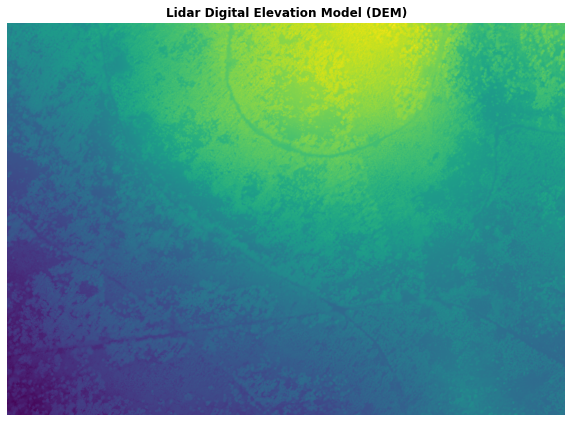

In [29]:
%matplotlib inline
from rasterio.plot import show
from matplotlib import pyplot as plt

# Plot the dem using raster.io
fig, ax = plt.subplots(figsize=(10,10))
show(raster, 
     title="Lidar Digital Elevation Model (DEM)", 
     ax=ax)
ax.set_axis_off()

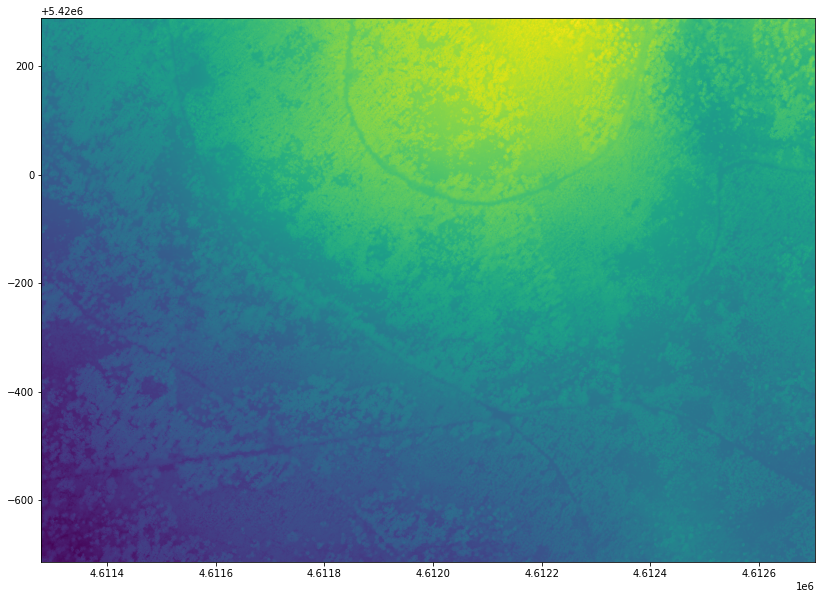

In [20]:
from rasterio.plot import show

with rasterio.open("Data/raster/DSM_small.tif") as src:
    dsm = src.read(1, masked= True)
    transform = src.transform

    
show(dsm, cmap='viridis', transform=transform)

### Exercise

- Import DSM_small.tif (folder: Data/raster)
- Write a function which which takes a raster file as input and returns informations about:
    - Driver
    - Height, Width
    - Number of Bands
    - Number of pixels
    - Pixel Size (Resoultion)
    - CRS
    - Data type
    - Coordinates of the bounding box
    - Min, Max, Mean 
- Plot a histrogram showing the distribution of height values

In [50]:
def get_pixels(rastername):
    with rasterio.open(rastername) as src:
        src.read
        pixels = src.width * src.height
        print("Number of pixels: " + str(pixels))
        print(src.res)

In [51]:
get_pixels("Data/raster/DSM_small.tif")

Number of pixels: 1425424
(1.0, 1.0)


AttributeError: 'DatasetReader' object has no attribute 'type'

In [59]:
with rasterio.open("Data/raster/DSM_small.tif") as src:
    dsm = src.read(1)
 
with rasterio.open("Data/raster/DTM_small.tif") as src:
    dtm = src.read(1)

raster_chm = dsm - dtm

### Export raster

If we want to export our raster data we always have to consider the metdata associated with the raster. For the raster math we used only the numpy arrays we have derived from the raster object. At the moment the CHM has no spatial arributes. 

In [60]:
raster_chm

array([[16.340027 , 22.5      , 21.980042 , ..., 13.800049 , 13.589966 ,
        13.660034 ],
       [20.619995 , 22.22998  , 20.039978 , ..., 15.209961 , 16.       ,
        12.530029 ],
       [21.650024 ,  4.419983 ,  6.0599976, ..., 13.089966 , 14.       ,
         7.6500244],
       ...,
       [40.410034 , 33.25     , 42.72003  , ...,  0.       ,  0.       ,
         0.       ],
       [31.899963 , 38.549988 , 33.79004  , ...,  2.3400269,  0.       ,
         0.       ],
       [35.820007 , 38.170044 , 38.589966 , ...,  7.380005 ,  6.8599854,
         0.       ]], dtype=float32)

In order to export a proper GeoTiff we need to assign all of the spatial attributes. Letś look at the metadata of our raster data object.

In [39]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4e+38,
 'width': 1424,
 'height': 1001,
 'count': 1,
 'crs': CRS.from_epsg(31468),
 'transform': Affine(1.0, 0.0, 4611279.0,
        0.0, -1.0, 5420288.0)}

In this case, we can use the metadata of our input object because nothing changed in the metadata. We only will  update the nodata value we have masked out. This can be achived with the  np.ma.filled() function. Therefor we create a copy of the metadata and update the nodata value

In [61]:
nodatavalue = -9999.0
raster_chm = np.ma.filled(raster_chm, fill_value=nodatavalue)
raster_chm.min(), nodatavalue

(-0.57995605, -9999.0)

In [64]:
chm_meta = src.meta.copy()
chm_meta.update({'nodata': nodatavalue})
chm_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1424,
 'height': 1001,
 'count': 1,
 'crs': CRS.from_epsg(31468),
 'transform': Affine(1.0, 0.0, 4611279.0,
        0.0, -1.0, 5420288.0)}

Now we can export our CHM as GeoTiff

In [43]:
out_path = "Data/raster/CHM_small.tif"
with rasterio.open(out_path, 'w', **chm_meta) as outf:
    outf.write(raster_chm, 1)

## Exercise

- Import DSM_small.tif and DTM_small.tif (folder: Data/raster)
- Create a Digital Height Model
- Create an elevation plot based on the generated digital height model (don't forget title,legend and axes)  

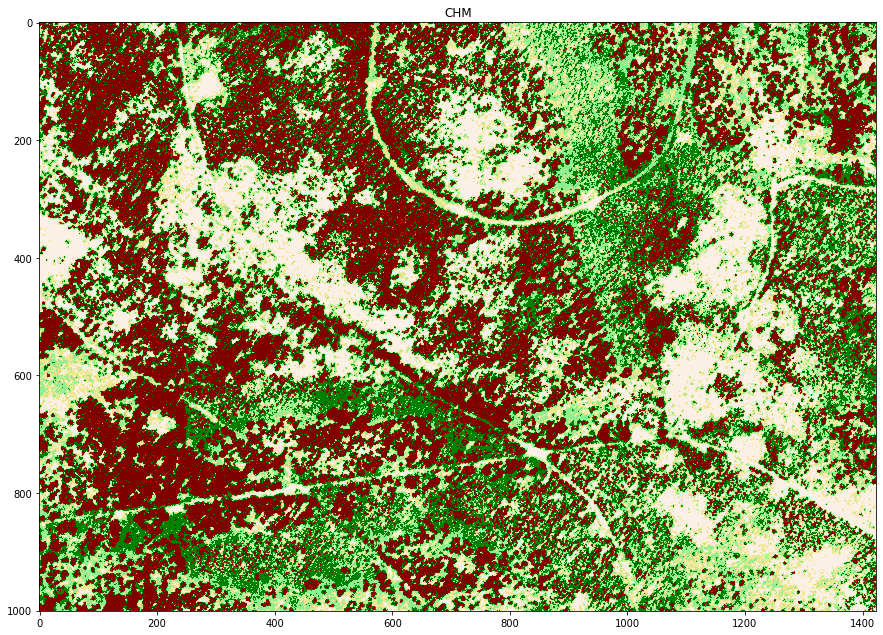

In [77]:
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

with rasterio.open('Data/raster/DSM_small.tif') as src:
    dsm = src.read(1)
    
with rasterio.open('Data/raster/DTM_small.tif') as src:
    dtm = src.read(1)
    
chm = dsm - dtm

class_bins = [chm.min(),2,7,12,18,np.inf]
colors = ['linen', 'khaki', 'lightgreen','green','maroon']
chm_classes = np.digitize(chm,class_bins)

cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

fig, ax = plt.subplots(figsize = (15,15))
plt.title('CHM')
ax.imshow(chm_classes,
         cmap=cmap)

### Masking / clipping raster

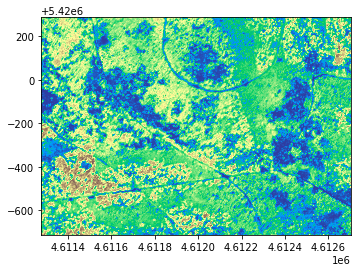

In [78]:
from rasterio import mask
from rasterio import plot
from shapely.geometry import box
import geopandas as gpd
import os
from fiona.crs import from_epsg
%matplotlib inline


raster = rasterio.open("Data/raster/CHM_small.tif")
plot.show((raster, 1), cmap='terrain')

Next we create a bounding box around the desired region and clip the raster based on that.

                                            geometry
0  POLYGON ((4612153.000 5419572.000, 4612153.000...


/home/sth02bh/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


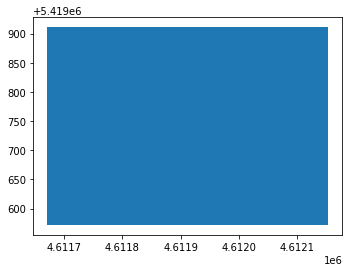

In [80]:
minx, miny = 4611671, 5419572
maxx, maxy = 4612153, 5419911
bbox = box(minx, miny, maxx, maxy)

boundary = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(31468))
print(boundary)
boundary.plot()

Now we need to get the coordinates in such a format that rasterio understands them. Therefor we use a function to convert the geometry into json format

In [81]:
import json

def extract_features(geodataframe):
    return [json.loads(geodataframe.to_json())['features'][0]['geometry']]


coords = extract_features(boundary)
print(coords)



[{'type': 'Polygon', 'coordinates': [[[4612153.0, 5419572.0], [4612153.0, 5419911.0], [4611671.0, 5419911.0], [4611671.0, 5419572.0], [4612153.0, 5419572.0]]]}]


Clipping the raster can be done with the mask function. Be sure you specifying clip=True.

In [54]:
# Clip the raster with Polygon
out_img, out_transform = mask.mask(dataset=raster, shapes=coords, crop=True)

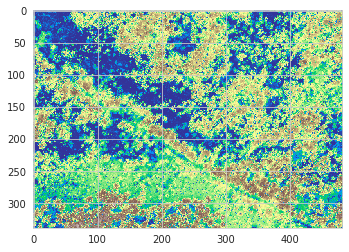

In [55]:
plot.show(out_img, cmap='terrain')

Don't forget to update the metadata

In [56]:
# Copy the metadata
out_meta = raster.meta.copy()
print(out_meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1424, 'height': 1001, 'count': 1, 'crs': CRS.from_epsg(31468), 'transform': Affine(1.0, 0.0, 4611279.0,
       0.0, -1.0, 5420288.0)}


In [57]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": raster.crs}
                         )

Now we can export our raster data

In [58]:
with rasterio.open("Data/raster/chm_clip", "w", **out_meta) as dest:
        dest.write(out_img)

### Mosaicing

First of all we need the different raster files we need for our mosaic

In [59]:
import os
import glob

search_criteria = "DSM*.tif"
q = os.path.join("Data/raster/", search_criteria)

raster_list = glob.glob(q)
raster_list

['Data/raster/DSM_small_2.tif', 'Data/raster/DSM_small.tif']

Now we can import all this files with rasterio

In [60]:

src_files_to_mosaic = []

for fp in raster_list:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    
src_files_to_mosaic   

[<open DatasetReader name='Data/raster/DSM_small_2.tif' mode='r'>,
 <open DatasetReader name='Data/raster/DSM_small.tif' mode='r'>]

..and merge them 

In [62]:
from rasterio.merge import merge
    
dest, output_transform=merge(src_files_to_mosaic, nodata = -9999, precision=7)

with rasterio.open("Data/raster/DSM_small.tif") as src:
        out_meta = src.meta.copy()    

        out_meta.update({"driver": "GTiff",
                 "height": dest.shape[1],
                 "width": dest.shape[2],
                 "transform": output_transform})

with rasterio.open("Data/raster/mosaic.tif", "w", **out_meta) as dest1:
        dest1.write(dest)

In [63]:
with rasterio.open('Data/raster/mosaic.tif') as src:
    mosaic = src.read(1)
    

Populating the interactive namespace from numpy and matplotlib


/home/nina/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot', 'box', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


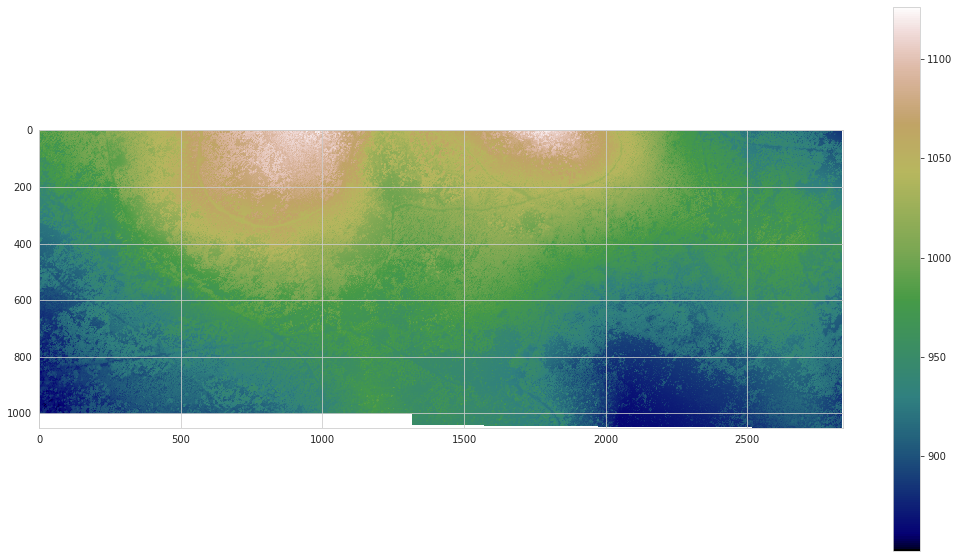

In [64]:
mosaic[( mosaic < 0)] = np.nan

    
# Plot the dem using raster.io
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(mosaic) 
cbar = plt.colorbar(); plt.set_cmap('gist_earth'); 

ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

## Exercise

A hillshade raster showa a grayscale 3D representation of the terrain surface, with the sun's relative position taken into account for shading the image. 

- Import the Canopy Height Model we have created
- Calculate the hillshade
- Visualize the resulting raster

## Working with multispectral data

<img src="images/multiband.jpg"  />

Source:http://www.charim.net/datamanagement/33

In [82]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
import rasterio
from rasterio import plot
import earthpy.plot as ep
import earthpy.spatial as es
import numpy as np

In [83]:
raster = rasterio.open('Data/raster/rgb_small.tif')

In [84]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
#print('Width: ',raster.width)
#print('Height: ',raster.height)

# Number of bands
print('Bands: ',raster.count)

# Bounds of the file
#print('Boundary: ',raster.bounds)

# Driver (data format)
#print('Driver: ', raster.driver)

# No data values for all channels
#print('NoData: ', raster.nodatavals)

# All Metadata for the whole raster dataset
#print('Metdata: ',raster.meta)

CRS:  PROJCS["unnamed",GEOGCS["DHDN",DATUM["Deutsches_Hauptdreiecksnetz",SPHEROID["Bessel 1841",6377397.155,299.1528128000033,AUTHORITY["EPSG","7004"]],TOWGS84[598.1,73.7,418.2,0.202,0.045,-2.455,6.7],AUTHORITY["EPSG","6314"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4314"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",12],PARAMETER["scale_factor",1],PARAMETER["false_easting",4500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]
Transform:  | 0.40, 0.00, 4611279.20|
| 0.00,-0.40, 5420286.80|
| 0.00, 0.00, 1.00|
Bands:  3


The raster array for a raster band can be accessed by calling dataset.read() using index number of a specific band (Be careful the index starts with 1 not with 0). This method returns a Numpy N-D array. Each single pixel value can be accessed by its row and column index.

In [88]:
band1 = raster.read(1)
#print(band1)

#print(band1[0,0])      # !! Indexing follows the python convention 
                      # and starts with 0
center = band1[raster.height // 2, raster.width // 2]
print(center)

91


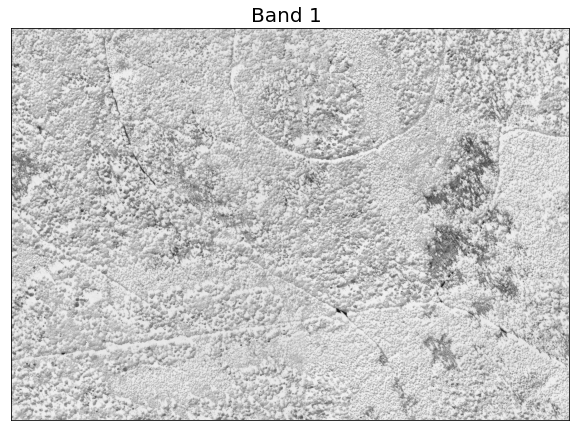

In [89]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.titlesize'] = 20

fig, ax = plt.subplots()
ax.imshow(band1, cmap='Greys')
ax.set(title="Band 1 ",
       xticks=[], yticks=[])
plt.show()

Instead of using matplotlib you can also use the earthpy function plot_bands(). 

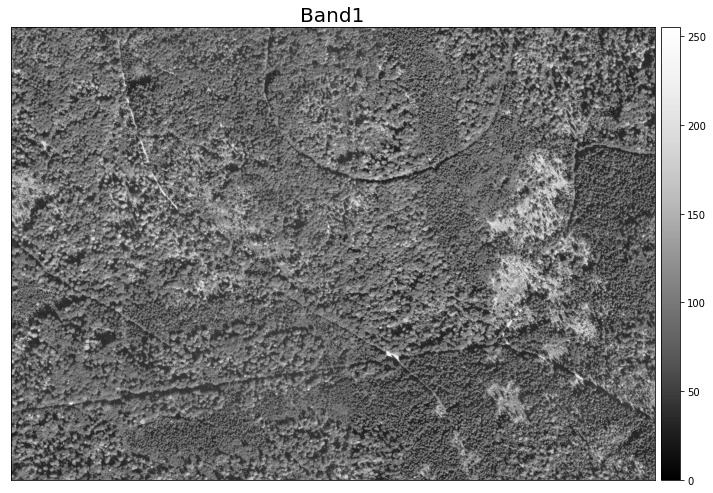

In [90]:
ep.plot_bands(band1, title="Band1")

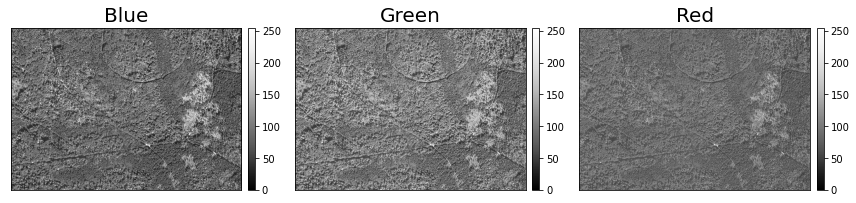

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41ea23f700>,
      dtype=object)

In [91]:
with rasterio.open('Data/raster/rgb_small.tif') as src:
    rgb = src.read()

# Plot all bands using earthpy

band_titles = ["Blue","Green","Red"]
ep.plot_bands(rgb,
              title=band_titles,
              cmap="Greys_r")


(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4201f86be0>,
       dtype=object))

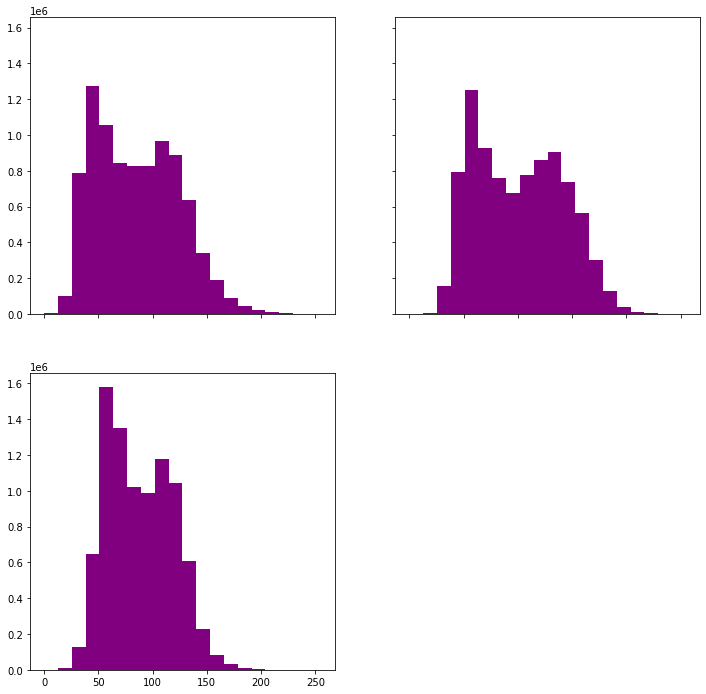

In [92]:
ep.hist(rgb)

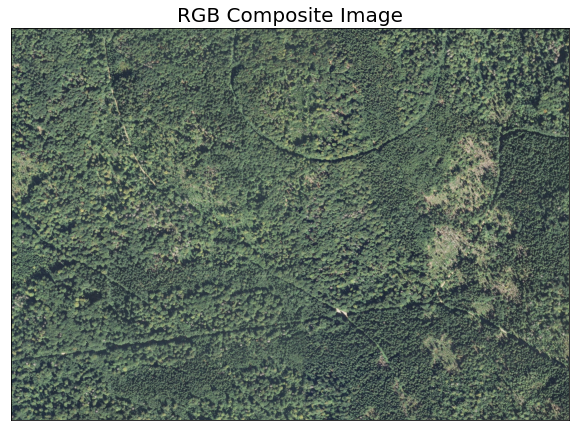

In [93]:
ep.plot_rgb(rgb,
           rgb=[0, 1, 2],
            title="RGB Composite Image")

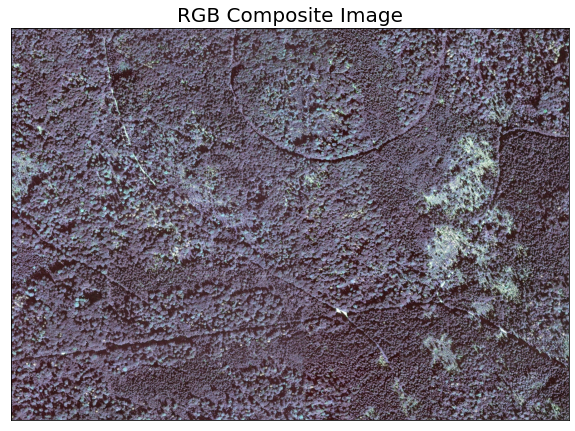

In [98]:
ep.plot_rgb(rgb,
           rgb=[2, 0, 1],
            title="RGB Composite Image",
            stretch=True,
            str_clip=0.1)

### Exercise

- Import the cir_small.tif
- Calculate the NDVI and visualize it